Raw data_All images\25k_3 images\D4_25kFlow_2percentSDSPBS_450xdilBatch3vWF_area1.jpg
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.816496580927726
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8033957832297914
1.0
1.0
1.0
0.9128709291752769
1.0
1.0
1.0
1.0
0.8519332209108986
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.7460004864039929
1.0
1.0
1.0
0.8303747291371639
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.43481019035755264
1.0
0.9873534931844618
1.0
1.0
1.0
1.0
0.4564865121086235
0.8006896170365398
1.0
1.0
1.0
0.9241763718304448
1.0
1.0
1.0
1.0
0.8456488513741202
1.0
0.8566090012021277
1.0
1.0
1.0
0.6891734050467498
0.877616130382453
1.0
1.0
0.6790032554579467
1.0
1.0
0.761950655639412
0.7789340941407709
0.6461887441307735
1.0
0.44345898346338103
1.0
1.0
1.0
0.7921937915438909
0.7732332639200996
1.0
1.0
0.48236655726267497
1.0
1.0
1.0
1.0
0.7513452804550825
0.8797413593771225
0.7669234009312764
1.0
1.0
1.0
0.9128709291752769
1.0
0.36959201970599176
0.5906734604272886
1.0
0.4486515850484714
1.0
1.0
0.968258350

0.603938880501009
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.816496580927726
1.0
0.6303615516523848
0.5996204651718579
1.0
0.90816716229313
1.0
1.0
1.0
0.6972167876977661
0.816496580927726
1.0
0.7823615332356553
1.0
1.0
1.0
1.0
1.0
1.0
0.6203730441089363
1.0
1.0
1.0
0.9128709291752769
1.0
0.8053400223746298
1.0
1.0
0.4245118923105269
1.0
1.0
1.0
1.0
1.0
1.0
0.818123661171008
1.0
1.0
1.0
0.6893636988574593
1.0
1.0
1.0
1.0
1.0
0.4680272636827753
1.0
0.6601498795195753
1.0
1.0
1.0
1.0
1.0
1.0
0.8213913276349742
1.0
1.0
0.516188512559115
0.8494531236983746
1.0
0.9770484855851236
0.7816828882793122
0.5168932463657809
1.0
1.0
1.0
0.6243275952867687
1.0
0.7297289699909768
1.0
1.0
1.0
1.0
0.6855296187407375
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.4475777015329724
1.0
1.0
0.6314847631851219
0.40821982571368776
0.4492015123307719
1.0
1.0
1.0
1.0
1.0
1.0
0.4534745073484145
1.0
1.0
0.816496580927726
0.5404367058215217
0.8381671060615903
1.0
1.0
0.4584020370160647
1.0
0.6712914259978054
0.9746687158738291
1.0
1.0
1.0

<Figure size 1080x1080 with 0 Axes>

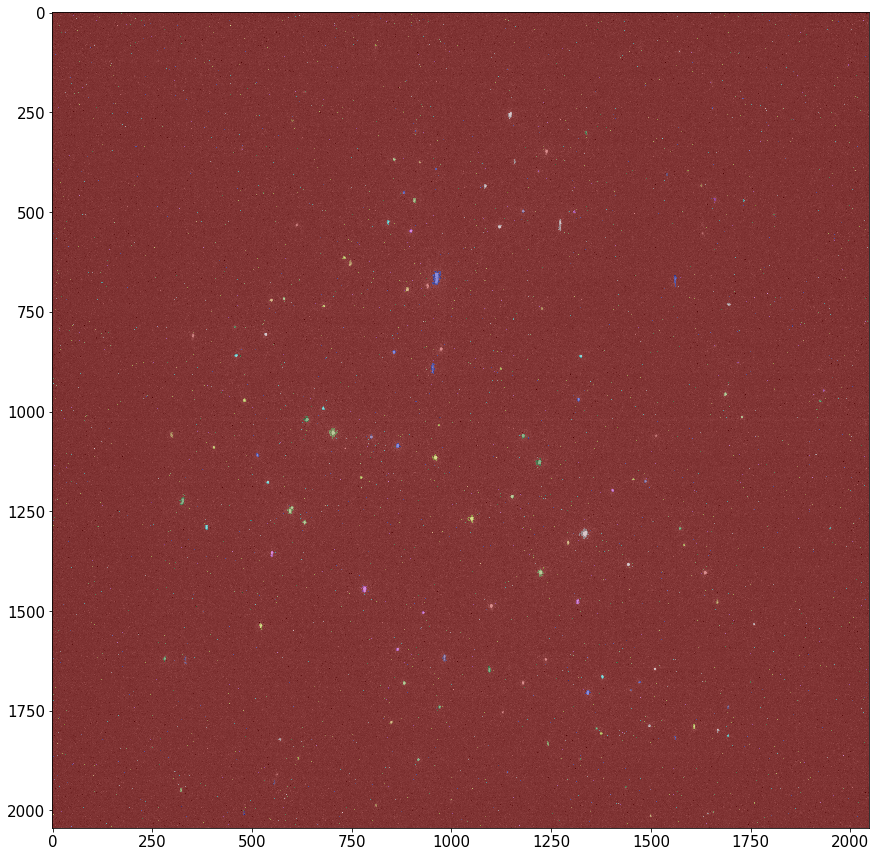

<Figure size 1080x1080 with 0 Axes>

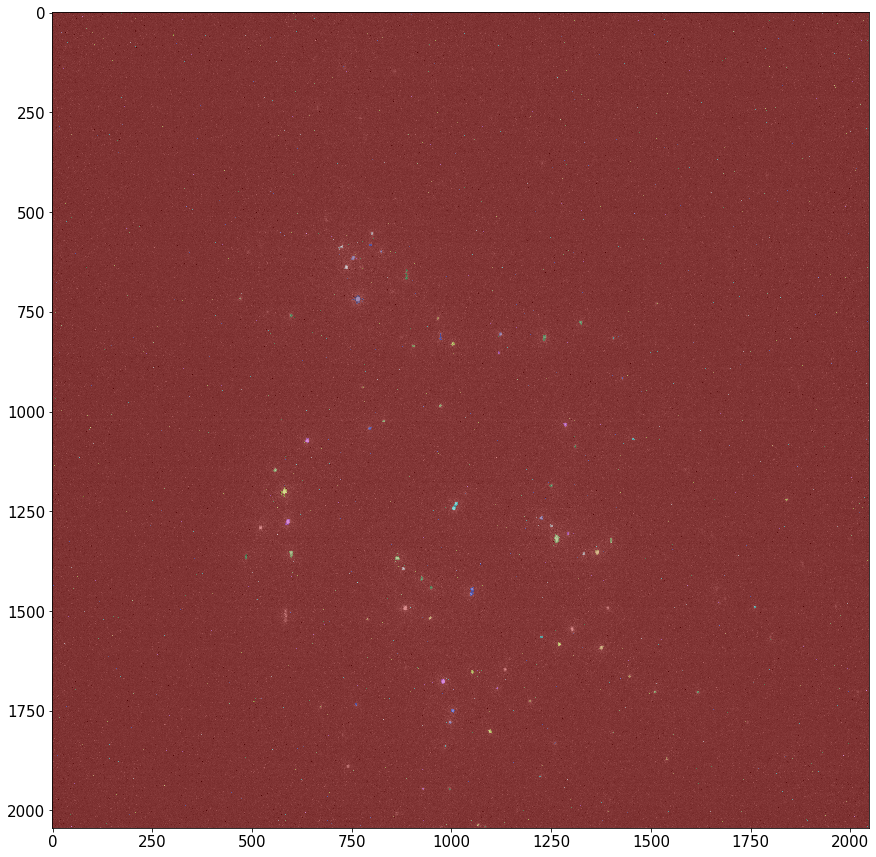

<Figure size 1080x1080 with 0 Axes>

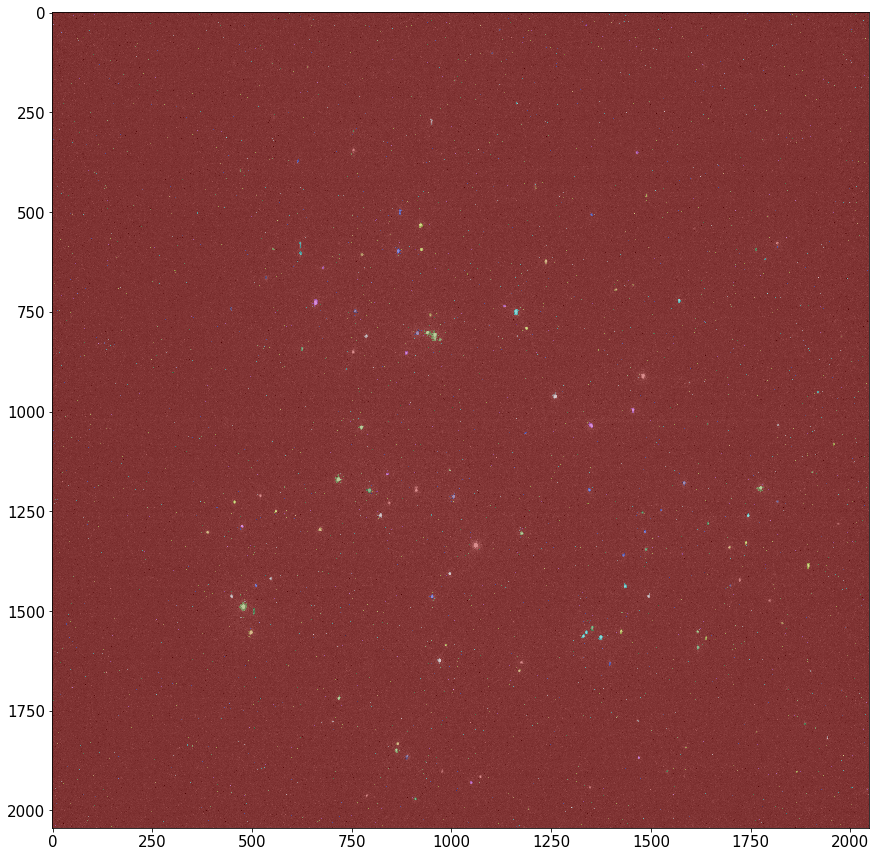

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pylab import *
from pathlib import Path
from skimage.color import rgb2gray
from skimage.measure import label, regionprops
from skimage.filters import threshold_yen
from skimage.morphology import closing, square
from skimage.segmentation import clear_border
from skimage.color import label2rgb
%matplotlib inline

# iterate over all images in a folder
pathlist = Path('Raw data_All images/25k_3 images').glob('**/*.jpg')
for path in pathlist:
    path_in_str = str(path)
    print(path_in_str)
    
    # open the image
    image = Image.open(path_in_str)
    img_array = np.array(image)
    image_gray = rgb2gray(img_array)
    
    # apply threshold
    image = image_gray
    thresh = threshold_yen(image)
    binary = image <= thresh
    bw = closing(image > thresh, square(3))
    plt.rcParams.update({'font.size': 15})
    plt.figure(figsize = (15,15))
#    imshow(binary,cmap=plt.cm.gray)
    
    # remove artifacts connected to image border
    cleared = clear_border(bw)
    
    # label image regions
    label_image = label(cleared)
    image_label_overlay = label2rgb(label_image, image=image)
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.imshow(image_label_overlay)
    
    # extract features
    props = regionprops(label_image,intensity_image=image_gray, coordinates='xy')
    for i in props: 
        #exclude circular dots
        if i.eccentricity > 0:                                
            print(i.eccentricity)